## Rubik's Cube Representation

A standard rubik's cube has 6 faces with 3x3 squares. Each face can be represented using a numpy array, with the ordering 
$$(front, up, down, left, right, top, bottom)$$
Each cube operation rotates one face $\pm90^\circ$. One way to do this is to use quaternions to define rotations in 3-dimensional space.

In [1]:
from Cube import RubiksCube
import pandas as pd
import itertools
%matplotlib inline
%load_ext autoreload

In [5]:
%autoreload 2

In [2]:
from Solver import SingleMoveScorer

In [2]:
c = RubiksCube()
for x in range(30):
    c.random_rotate()


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 3) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 4) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 5) will ret

In [4]:
import tflearn

In [38]:
scorer = SingleMoveScorer()

In [39]:
done = False
count = 0
while not done:
    done = c.solver_func(SingleMoveScorer)
    count+=1

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 3) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 4) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 5) will ret

KeyboardInterrupt: 

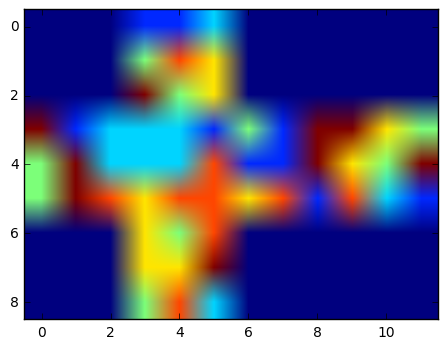

In [40]:
c.show_layout()

In [41]:
count

13666

## How Many Rotations are Needed?

Starting from an initial solved cube, I'll rotate the cube a fixed number of times and look at the distribution of their similarity to the intial state

In [88]:
n_samps = 10000
n_rots = 100
l=[]
for x in range(n_samps):
    c = RubiksCube()
    for y in range(n_rots):
        c.random_rotate()
        l.append((y,c.score_similarity()))
rot_df = pd.DataFrame(l,columns={"Rotations","Score"})

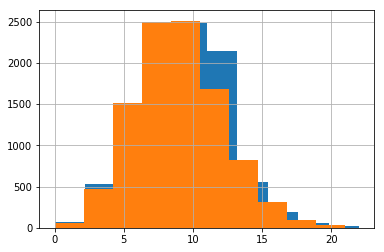

In [93]:
rot_df[rot_df["Rotations"]==50]["Score"].hist()

rot_df[rot_df["Rotations"]==99]["Score"].hist()

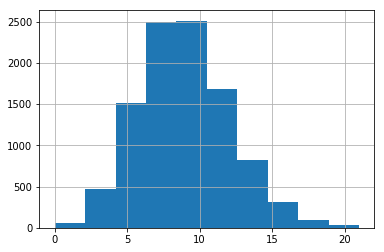

In [94]:
rot_df[rot_df["Rotations"]==99]["Score"].hist()